### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#### Load the customer tip dataset and print the first five observations

In [2]:
df = pd.read_csv('customer_tip.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Make a list of categorical and numerical variables in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
print('Categorical variables:',list(df.select_dtypes('object').columns))
print()
print('Numerical variables:',list(df.select_dtypes(np.number).columns))

Categorical variables: ['sex', 'smoker', 'day', 'time']

Numerical variables: ['total_bill', 'tip', 'size']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Compute the average bill amount for each day
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
pd.DataFrame(df.groupby('day')['total_bill'].mean()).reset_index()

,day,total_bill
0,Fri,17.151579
1,Sat,20.441379
2,Sun,21.410000
3,Thur,17.682742


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Which gender is more generous in giving the tip?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.groupby('sex')['tip'].sum()

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [6]:
print(df.groupby('sex')['tip'].sum().nlargest(1).index[0],'are generous in tipping with a total tip amount of',
      df.groupby('sex')['tip'].sum().nlargest(1)[0])

Male are generous in tipping with a total tip amount of 485.07


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. According to the data, were there more customers for dinner or lunch? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [8]:
# More number of customers were present for Dinner

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Based on the statistical summary, comment on the variable 'tip'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
# Average tipping amount is $3.

# Maximum tipped amount is $10 and minimum is $1

# The tipping amount on an average is $1.3 spread out from the mean tip amount 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the busiest day in terms of the orders
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df['day'].value_counts().nlargest(1)

Sat    87
Name: day, dtype: int64

In [12]:
# Saturday is the busiest day wirh 87 orders

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df['total_bill'].skew()

1.1332130376158205

In [14]:
# It is positively skewed i.e. heavily right tailed

<Axes: xlabel='total_bill', ylabel='Density'>

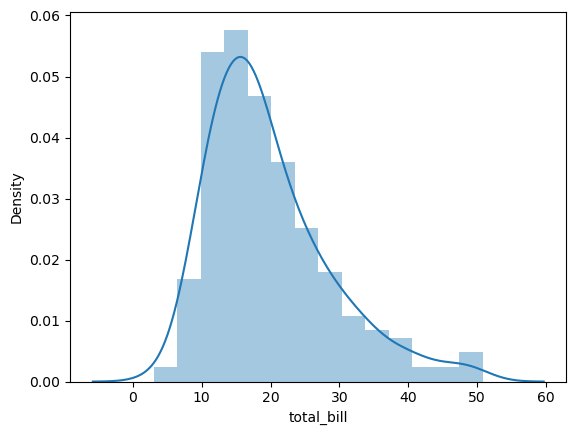

In [15]:
sns.distplot(df['total_bill'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Is the tip amount dependent on the total bill?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [17]:
# Tip amoun is 67% dependent on total bill

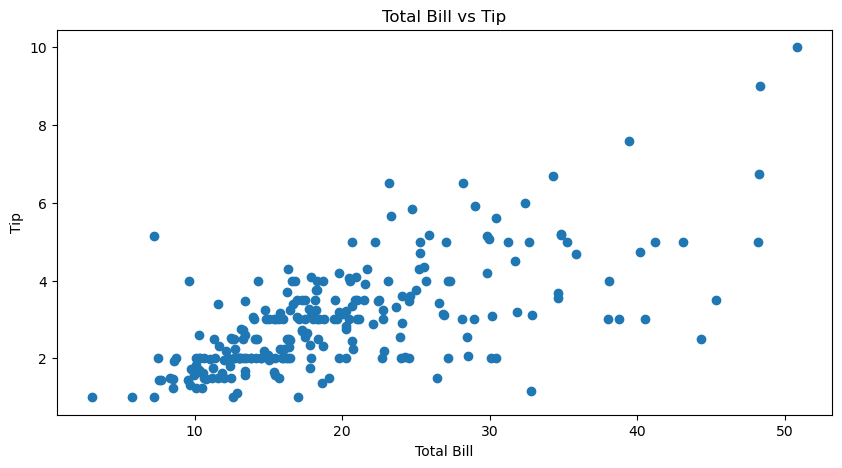

In [18]:
fig = plt.figure(figsize=(10,5))
plt.scatter(data=df,x='total_bill',y='tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  What is the value under which 20% of the total bill would lie?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
print('20% of bill amount lies under ${}'.format(round(df['total_bill'].quantile(0.20),2)))

20% of bill amount lies under $12.64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Retrieve the orders where the bill amount is more than 2 standard deviation away from the average bill </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# We are going to use Z-Score, Z-score tells us how many standard deviations away from the mean a data point is located.
df['Z_TB']=stats.zscore(df['total_bill'],axis=0)

In [21]:
df[(df['Z_TB']<-2) | (df['Z_TB']>2)]

,total_bill,tip,sex,smoker,day,time,size,Z_TB
23,39.42,7.58,Male,No,Sat,Dinner,4,2.210010
56,38.01,3.00,Male,Yes,Sat,Dinner,4,2.051300
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
95,40.17,4.73,Male,Yes,Fri,Dinner,4,2.294430
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
112,38.07,4.00,Male,No,Sun,Dinner,3,2.058054
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.877490
